[Text(0, 0, '10')]

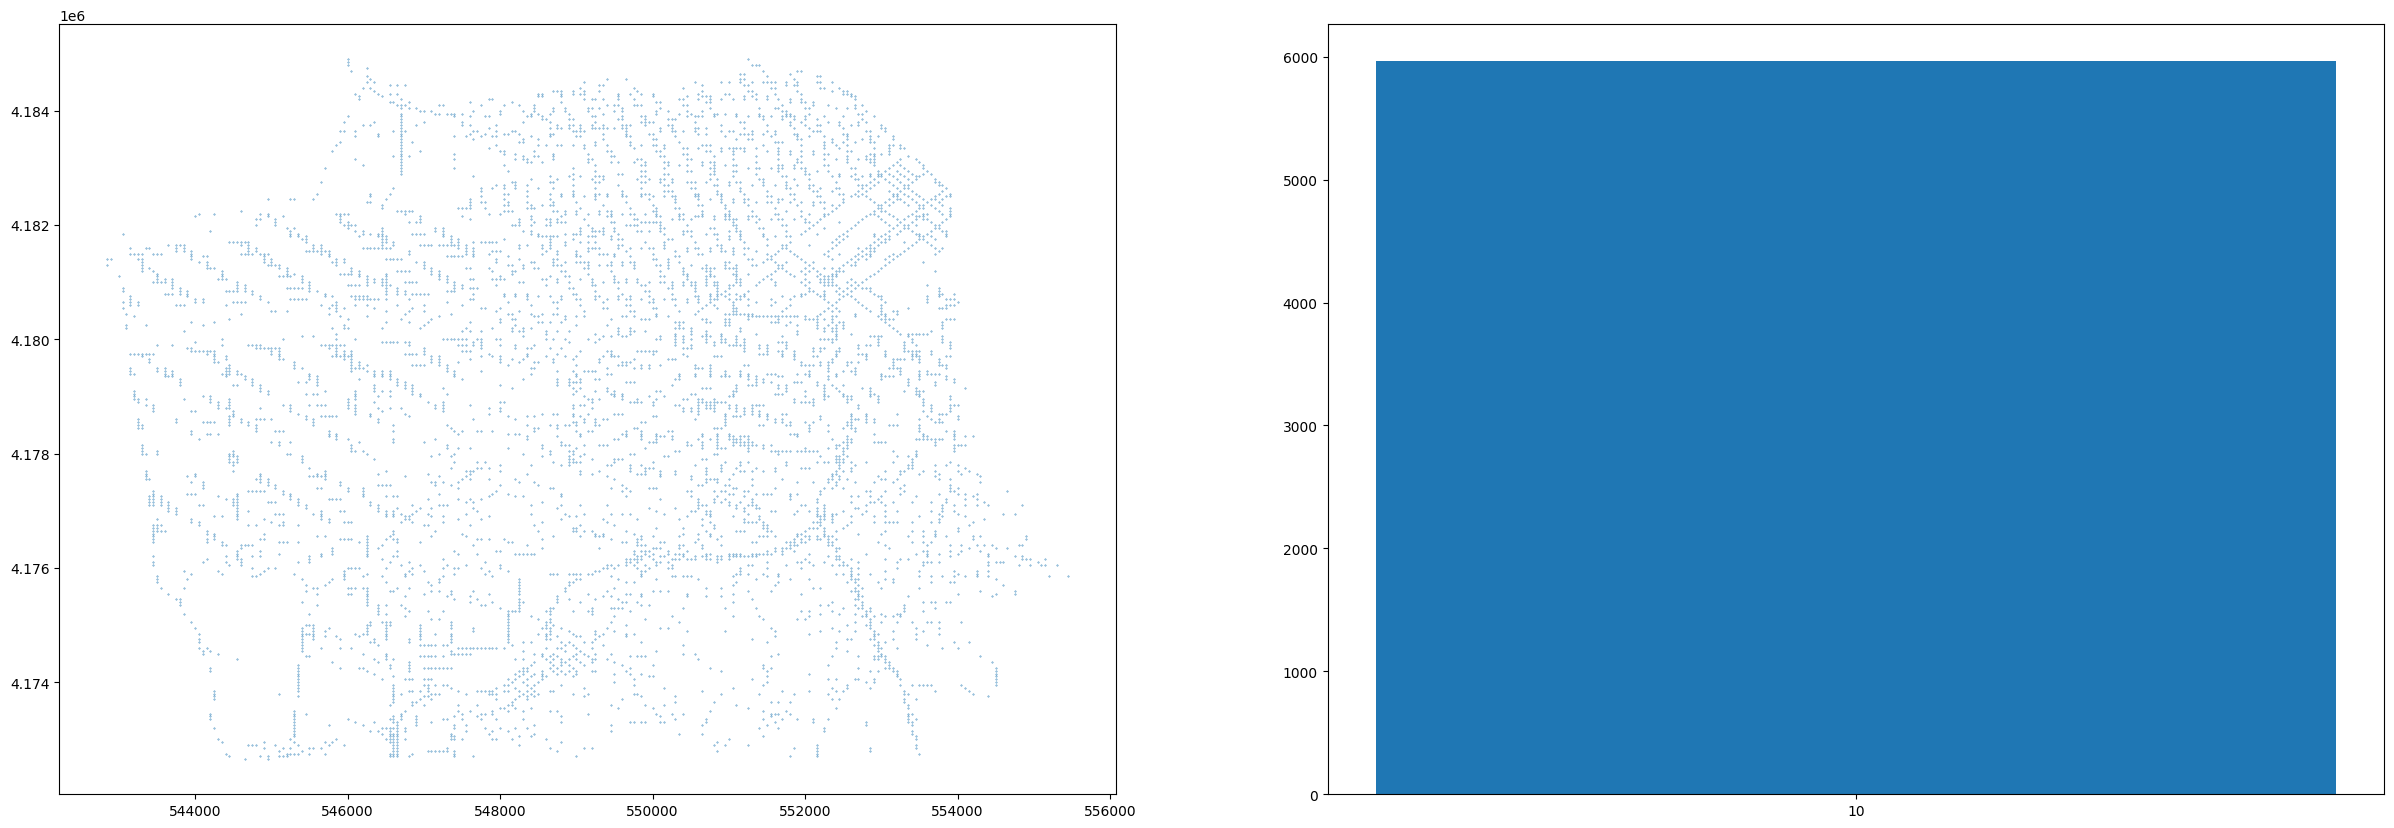

In [64]:
from collections import Counter
from matplotlib import pyplot as plt
import torch
import numpy as np

M = 10
N = 5
filename = f"F:/Programmazione/Politecnico/Master's Degree/2nd Year/AML/Project/Materials/Training/cache/_M10_N5_mipc10.torch"  # Change to actual folder
classes_per_group, images_per_class = torch.load(filename)

class_ids = [(x, y) for x, y, _ in classes_per_group[0]] # Third id (heading) always 0, discarded for visualization purposes
group_ids = set([(x % (M * N) // M, y % (M * N) // M) for x, y, _ in classes_per_group[0]])
assert len(group_ids) == 1, group_ids
images_per_class = { k: len(v) for k, v in images_per_class.items() }

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30,10))
ax1.scatter(*zip(*class_ids), s=0.1)
panoramas_per_cells = Counter(images_per_class.values())
labels, values = zip(*panoramas_per_cells.items())
indexes = np.arange(len(labels))
ax2.bar(indexes, values, 1)
ax2.set_xticks(indexes)
ax2.set_xticklabels(labels)


Found 1 group


[Text(0, 0, '10')]

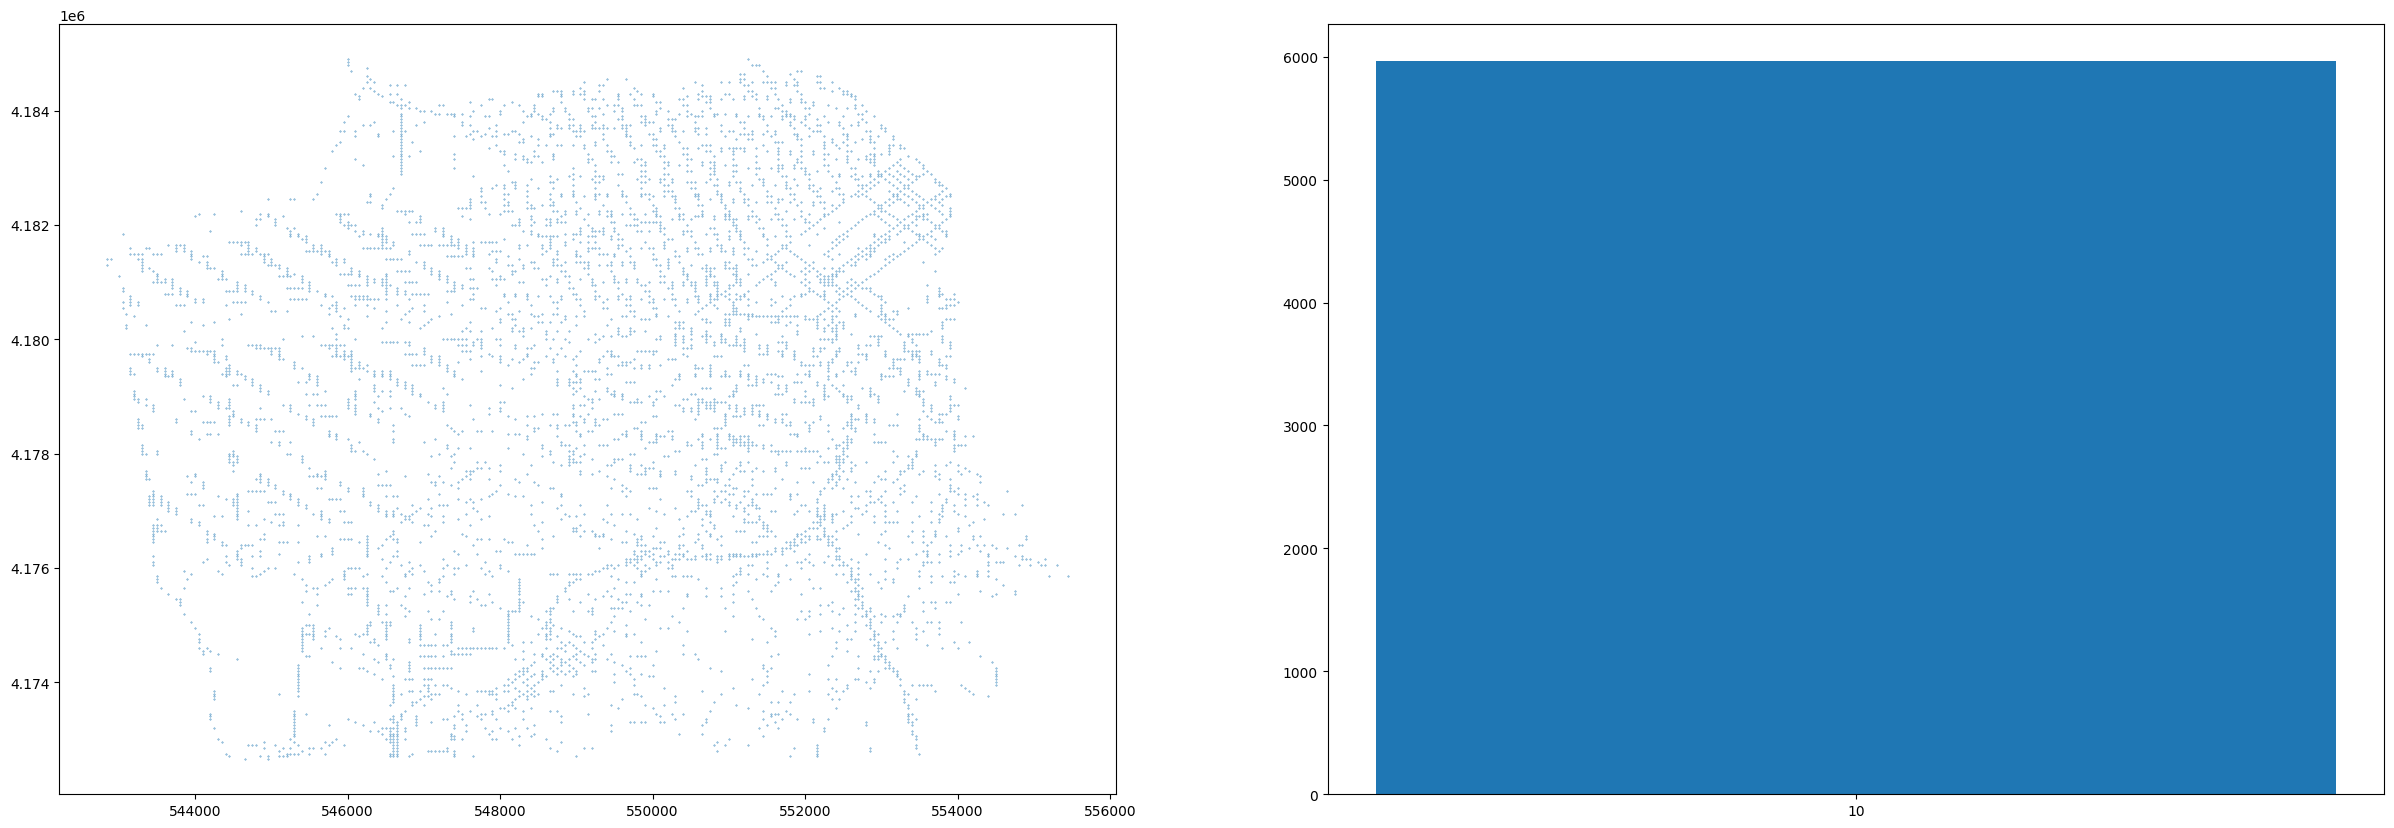

In [65]:
from collections import defaultdict, Counter
from glob import glob
from datasets.train_dataset import TrainDataset
from matplotlib import pyplot as plt
import torch
import numpy as np
import os

dataset_folder = f"F:/Programmazione/Politecnico/Master's Degree/2nd Year/AML/Project/Datasets/sf_xs/train" # Change to actual folder
M = 10
N = 5

images_paths = sorted(glob(f"{dataset_folder}/**/*.jpg", recursive=True))
images_metadatas = [p.split("@") for p in images_paths]
utmeast_utmnorth_heading = [(m[1], m[2], m[9]) for m in images_metadatas]
utmeast_utmnorth_heading = np.array(utmeast_utmnorth_heading).astype(float)
class_id__group_id = [TrainDataset.get__class_id__group_id(*m, M, 30, N, 2)
                        for m in utmeast_utmnorth_heading]

images_per_class = defaultdict(list)
for image_path, (class_id, _) in zip(images_paths, class_id__group_id):
    images_per_class[class_id].append(image_path)
    
classes_per_group = defaultdict(set)
for class_id, group_id in class_id__group_id:
    if class_id not in images_per_class:
        continue  # Skip classes with too few images
    classes_per_group[group_id].add(class_id)

# Convert classes_per_group to a list of lists.
# Each sublist represents the classes within a group.
classes_per_group = [list(c) for c in classes_per_group.values()]
print(f'Found {len(classes_per_group)} group{"" if len(classes_per_group) == 1 else "s"}')

class_ids = [(x, y) for x, y, _ in classes_per_group[0]] # Third id (heading) always 0, discarded for visualization purposes, take the first since one group only
images_per_class = { k: len(v) for k, v in images_per_class.items() }

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30,10))
ax1.scatter(*zip(*class_ids), s=0.1)
panoramas_per_cells = Counter(images_per_class.values())
labels, values = zip(*panoramas_per_cells.items())
indexes = np.arange(len(labels))
ax2.bar(indexes, values, 1)
ax2.set_xticks(indexes)
ax2.set_xticklabels(labels)